In [104]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
files = [file for file in os.listdir('./Sales_Data')]
all_month = pd.DataFrame()

In [5]:
for file in files:
    df = pd.read_csv('./Sales_Data/' +file)
    all_month = pd.concat([all_month, df])

In [9]:
all_month.to_csv('all.csv', index=False)

In [10]:
df = pd.read_csv('all.csv')

In [36]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [13]:
df['Month'] = df['Order Date'].str[0:2]

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [15]:
df = df.dropna(how='any')

In [23]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [25]:
df['Month'].unique()

array(['04', '05', 'Or', '08', '09', '12', '01', '02', '03', '07', '06',
       '11', '10'], dtype=object)

Lets get rid of 'Or'.

In [30]:
df = df[df['Order Date'].str[0:2] != 'Or']

In [38]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')

C:\Users\Shihab.Rashed\AppData\Local\Temp\ipykernel_24188\361002136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Order Date'].str[0:2]
C:\Users\Shihab.Rashed\AppData\Local\Temp\ipykernel_24188\361002136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Month'].astype('int32')


In [39]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [35]:
df['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

Now the values are all integers. We finally got rid of the 'Or'.

AttributeError: 'DataFrame' object has no attribute 'dtype'

### Question Nr.1 : What was the best month for sales?

In [40]:
df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')

C:\Users\Shihab.Rashed\AppData\Local\Temp\ipykernel_24188\1278832166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')


In [41]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [45]:
df.groupby(['Month']).sum()

,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


C:\Users\Shihab.Rashed\AppData\Local\Temp\ipykernel_24188\146895897.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


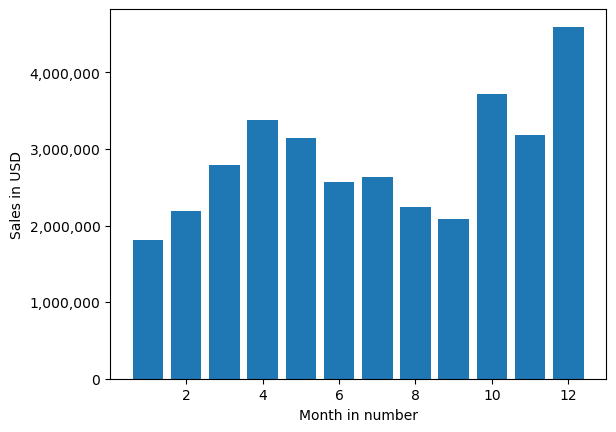

In [76]:
month = range(1,13)
plt.bar(month,df.groupby(['Month']).sum()['Sales'])
plt.ylabel('Sales in USD')
plt.xlabel('Month in number')
plt.ticklabel_format(style='plain') #to prevent scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

This cleary shows, that Decembre seems to be the best month for sales. Since that month falls into christmas season, it does make sense for customers to be buying more products than during any other time of the year.

### Question Nr.2: What city had the most sales?

In [67]:
df.groupby(['City']).sum()

,Month,Sales
City,,
Atlanta (GA),104794,2784555
Austin (TX),69829,1812297
Boston (MA),141112,3646904
Dallas (TX),104620,2757017
Los Angeles (CA),208325,5430629
New York City (NY),175741,4645903
Portland (ME),17144,447951
Portland (OR),70621,1863342
San Francisco (CA),315520,8229136


We should extract the city from the adress.

In [63]:
#I found this helpful function during my google search. This makes it a lot easier.
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df.head()  

C:\Users\Shihab.Rashed\AppData\Local\Temp\ipykernel_24188\2372053019.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99,Boston (MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11,Los Angeles (CA)


In [66]:
df.groupby(['City']).sum()
#I wonder why pandas just adds all months together.

,Month,Sales
City,,
Atlanta (GA),104794,2784555
Austin (TX),69829,1812297
Boston (MA),141112,3646904
Dallas (TX),104620,2757017
Los Angeles (CA),208325,5430629
New York City (NY),175741,4645903
Portland (ME),17144,447951
Portland (OR),70621,1863342
San Francisco (CA),315520,8229136


In [68]:
keys = [city for city, df in df.groupby(['City'])]

C:\Users\Shihab.Rashed\AppData\Local\Temp\ipykernel_24188\86724238.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


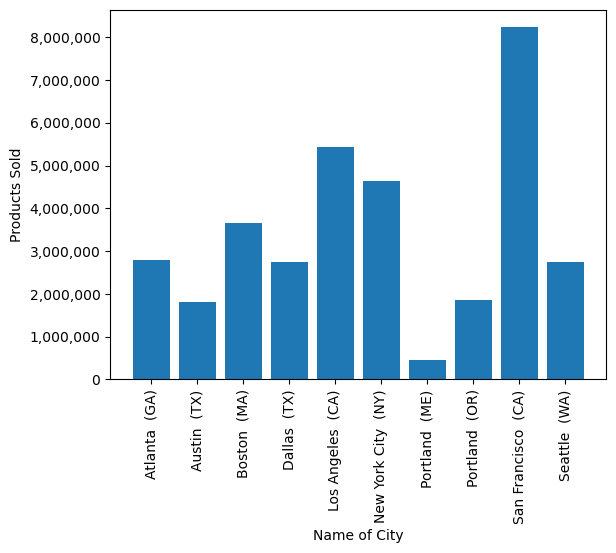

In [77]:
plt.bar(keys,df.groupby(['City']).sum()['Sales'])
plt.ylabel('Products Sold')
plt.xlabel('Name of City')
plt.xticks(keys, rotation='vertical')
plt.ticklabel_format(style='plain', axis = 'y')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

### Answer: As it seems, San Francisco has the highest number of sales. If we take a closer look:

In [89]:
df_sanfran = df.loc[df['City'] == 'San Francisco  (CA)']

In [112]:
df_sanfran['Product'].value_counts()

USB-C Charging Cable          5368
Lightning Charging Cable      5174
AAA Batteries (4-pack)        4932
AA Batteries (4-pack)         4903
Wired Headphones              4592
Apple Airpods Headphones      3705
Bose SoundSport Headphones    3287
27in FHD Monitor              1803
iPhone                        1660
27in 4K Gaming Monitor        1456
34in Ultrawide Monitor        1442
Google Phone                  1355
Flatscreen TV                 1149
Macbook Pro Laptop            1134
20in Monitor                   993
ThinkPad Laptop                963
Vareebadd Phone                493
LG Washing Machine             180
LG Dryer                       143
Name: Product, dtype: int64

In [115]:
percent_product = (df_sanfran['Product'].value_counts() / df_sanfran['Product'].value_counts().sum()) * 100
percent_product

USB-C Charging Cable          12.000358
Lightning Charging Cable      11.566664
AAA Batteries (4-pack)        11.025664
AA Batteries (4-pack)         10.960833
Wired Headphones              10.265582
Apple Airpods Headphones       8.282661
Bose SoundSport Headphones     7.348207
27in FHD Monitor               4.030672
iPhone                         3.710990
27in 4K Gaming Monitor         3.254941
34in Ultrawide Monitor         3.223643
Google Phone                   3.029151
Flatscreen TV                  2.568631
Macbook Pro Laptop             2.535098
20in Monitor                   2.219887
ThinkPad Laptop                2.152821
Vareebadd Phone                1.102119
LG Washing Machine             0.402396
LG Dryer                       0.319682
Name: Product, dtype: float64

###  We can see, that a combined 23% of all products sold were charging cables( USB-C and Lightning). Since Silicon Valley is part of San Francisco and Google Phones and iPhones are the two most common type of phones on the market, this could explain why so may people from the Bay Area are interested in buying charging cables for their phones.

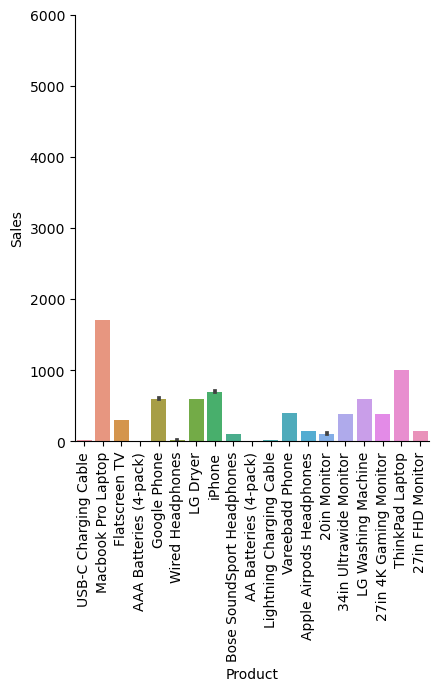

In [111]:
chart = sb.catplot(x='Product', y = 'Sales', data=df_sanfran, kind='bar')
plt.xticks(rotation=90)
plt.ylim(0, 6000)
plt.show()

### Question Nr.3: What product sold the most overall?

In [131]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32') #convert the datatype of the column 'Quantity Ordered' to
#integer. Otherwise we would get some datatype issues later on when calling the .sum() function.
products = df.groupby(['Product'])


C:\Users\Shihab.Rashed\AppData\Local\Temp\ipykernel_24188\1082177479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')


In [132]:
products.head()
quantity = products['Quantity Ordered'].sum()
quantity

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

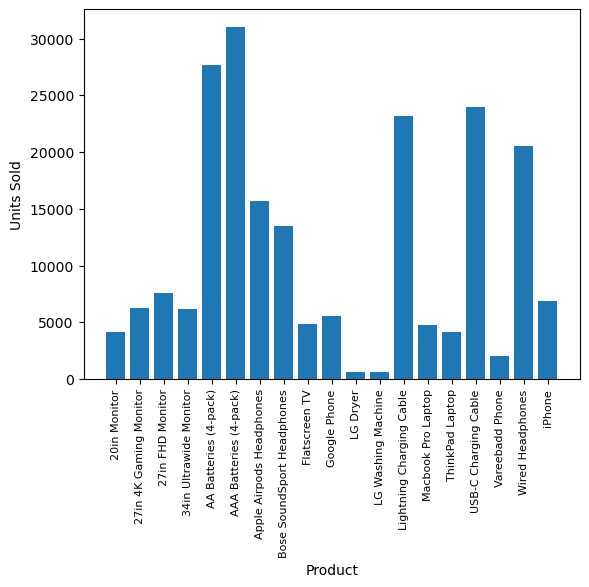

In [138]:
keys = [pair for pair, df in products]

quantity = products['Quantity Ordered'].sum()

plt.bar(keys, quantity)
plt.xticks(keys, rotation='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.show()

### The Batteries were the products, that were sold the most.

### Question Nr. 4: What was the time that people ordered the most?

In [135]:
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['Count'] = 1
df.head()


C:\Users\Shihab.Rashed\AppData\Local\Temp\ipykernel_24188\995912680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
C:\Users\Shihab.Rashed\AppData\Local\Temp\ipykernel_24188\995912680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
C:\Users\Shihab.Rashed\AppData\Local\Temp\ipykernel_24188\995912680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99,Boston (MA),22,30,1
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11,Los Angeles (CA),9,27,1


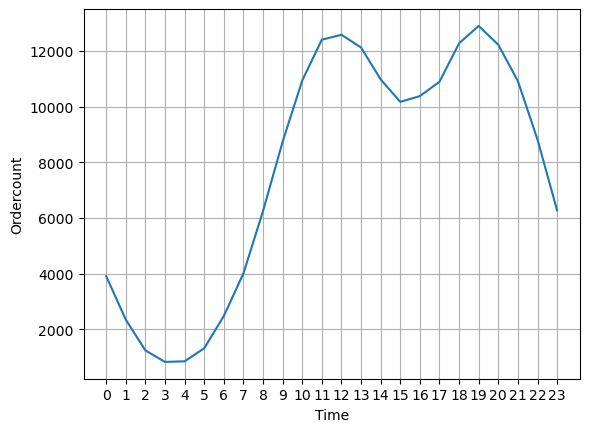

In [137]:
keys = [pair for pair, df in df.groupby(['Hour'])]

plt.plot(keys, df.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.xlabel('Time')
plt.ylabel('Ordercount')
plt.grid()
plt.show()

### Answer: Most products were sold around 11/12 AM or 7 PM.